<a href="https://colab.research.google.com/github/jongnnis/ATP-Match-Prediction/blob/main/ATP_%EC%8A%B9%EB%B6%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. ATP Tennis 데이터셋

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
atp_df = pd.read_csv('/content/drive/MyDrive/KDT 공부/8. 머신러닝과 딥러닝/data/ATP Dataset_2012-01 to 2017-07_Int_V4.csv')
atp_df

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
0,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,YmerE.,6.7633,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752
1,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,MahutN.,6.9297,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115
2,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,TomicB.,6.5792,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975
3,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,EdmundK.,6.8384,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322
4,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,JohnsonS.,6.7032,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,65,MastersCup,1.7532,41223,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FedererR.,6.9997,DelPotroJ.M.,6.0310,2.0,7.0,1.42,2.82,0.7042,0.3546
14731,65,MastersCup,1.7532,41223,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FerrerD.,6.3881,TipsarevicJ.,6.5461,5.0,9.0,1.20,4.55,0.8333,0.2198
14732,65,MastersCup,1.7532,41224,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,DelPotroJ.M.,6.0310,DjokovicN.,6.9457,7.0,1.0,4.28,1.22,0.2336,0.8197
14733,65,MastersCup,1.7532,41224,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FedererR.,6.9997,MurrayA.,6.2537,2.0,3.0,2.16,1.68,0.4630,0.5952


In [ ]:
atp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14735 entries, 0 to 14734
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ATP                   14735 non-null  int64  
 1   Tournament            14735 non-null  object 
 2   Tournament_Int        14735 non-null  float64
 3   Date                  14735 non-null  int64  
 4   Series                14735 non-null  object 
 5   Series_Int            14735 non-null  float64
 6   Court                 14735 non-null  object 
 7   Court_Int             14735 non-null  float64
 8   Surface               14735 non-null  object 
 9   Surface_Int           14735 non-null  float64
 10  Round                 14735 non-null  object 
 11  Round_Int             14735 non-null  float64
 12  Best_of               14735 non-null  int64  
 13  Winner                14735 non-null  object 
 14  Winner_Int            14735 non-null  float64
 15  Player1            

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
atp_df.head()

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,Round,Round_Int,Best_of,Winner,Winner_Int,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
0,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,1stRound,5.1257,3,ThompsonJ.,6.7926,YmerE.,6.7633,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752
1,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,1stRound,5.1257,3,MahutN.,6.9297,MahutN.,6.9297,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115
2,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,1stRound,5.1257,3,FerrerD.,6.3881,TomicB.,6.5792,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975
3,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,1stRound,5.1257,3,EdmundK.,6.8384,EdmundK.,6.8384,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322
4,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,1stRound,5.1257,3,DimitrovG.,6.5157,JohnsonS.,6.7032,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092


* ATP	: 년도별 대회순서
* Tournament : 대회명
* Tournament_Int : 대회번호
* Date : 대회날짜 코드
* Series : 대회 분류
* Series_Int : 대회 분류번호
* Court : 야외/실내 코트 여부
* Court_Int : 야외/실내 코트 코드
* Surface	: 코트 표면
* Surface_Int : 코트 표면 코드
* Round : 몇 강인지 여부
* Round_Int : 라운드 코드
* Best_of : 최대 세트 수
* Winner : 승자 이름
* Winner_Int : 승자 코드
* Player1 : 선수1 이름
* Player1_Int : 선수1 코드
* Player2 : 선수2 이름
* Player2_Int : 선수2 코드
* Player1_Rank : 선수1 랭킹
* Player2_Rank : 선수2 랭킹
* Player1_Odds : 선수1 배당률
* Player2_Odds : 선수2 배당
* Player1_Implied_Prob : 선수1 승리 예측 확률
* Player2_Implied_Prob : 선수2 승리 예측 확률

<ipython-input-7-405a4bc752f2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(atp_df.corr(), cmap='coolwarm', vmin=-1, annot=True)


<Axes: >

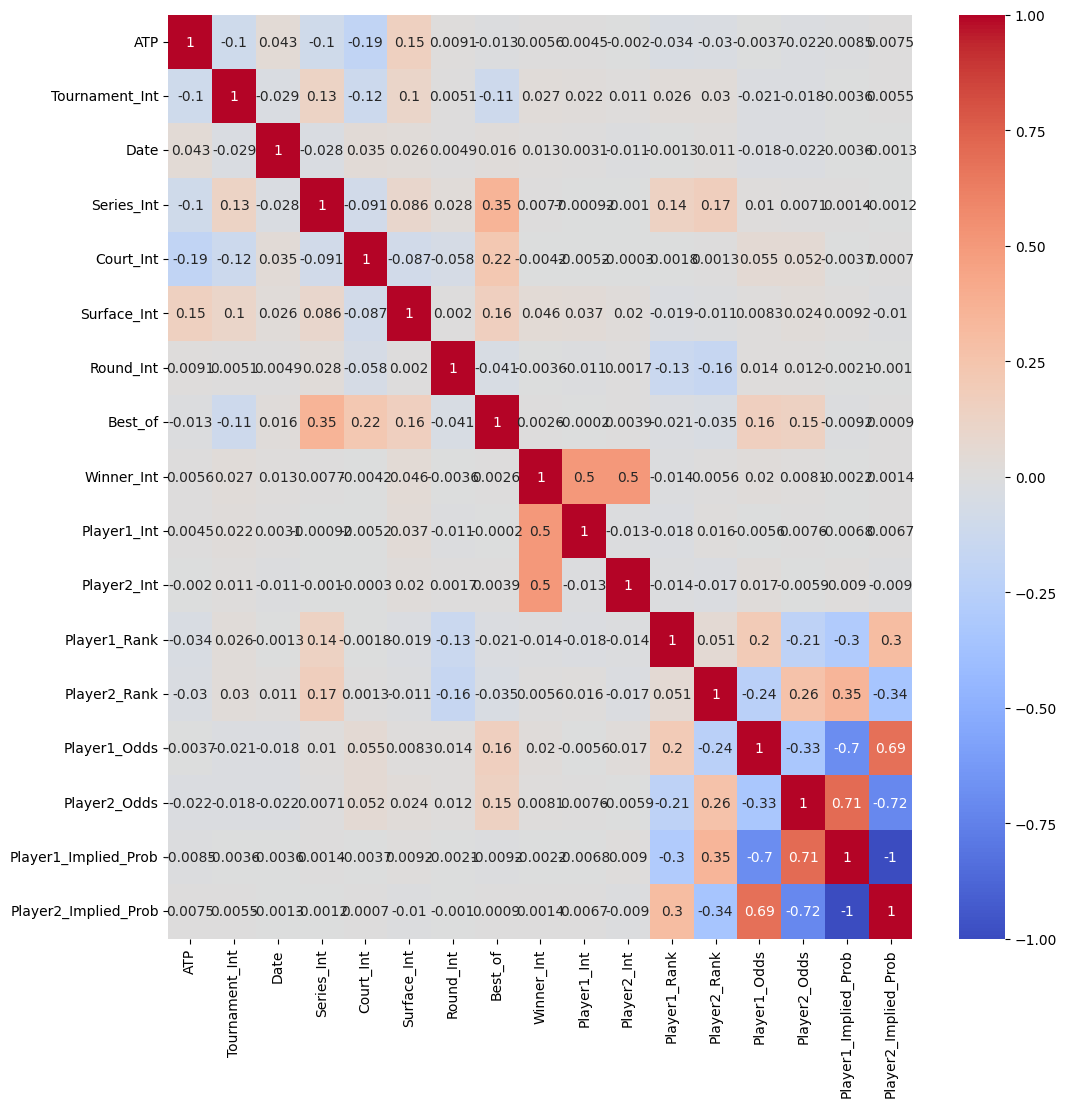

In [ ]:
# heatmap을 통해 상관관계를 확인
plt.figure(figsize=(12,12))
sns.heatmap(atp_df.corr(), cmap='coolwarm', vmin=-1, annot=True)

여러 컬럼들을 통해 Player1, Player2 중 누가 승리할지 예측하는 프로그램 만들기

종속변수 : Winner_Int

# 2. 데이터 전처리

In [ ]:
atp_df.isna().sum()

ATP                      0
Tournament               0
Tournament_Int           0
Date                     0
Series                   0
Series_Int               0
Court                    0
Court_Int                0
Surface                  0
Surface_Int              0
Round                    0
Round_Int                0
Best_of                  0
Winner                   0
Winner_Int               0
Player1                  0
Player1_Int              0
Player2                  0
Player2_Int              0
Player1_Rank            23
Player2_Rank            15
Player1_Odds             0
Player2_Odds             0
Player1_Implied_Prob     0
Player2_Implied_Prob     0
dtype: int64

In [ ]:
# 랭킹이 없는 선수들 결측값 -1로 바꿔주기
atp_df.fillna(-1, inplace=True)

In [ ]:
atp_df.isna().sum()

ATP                     0
Tournament              0
Tournament_Int          0
Date                    0
Series                  0
Series_Int              0
Court                   0
Court_Int               0
Surface                 0
Surface_Int             0
Round                   0
Round_Int               0
Best_of                 0
Winner                  0
Winner_Int              0
Player1                 0
Player1_Int             0
Player2                 0
Player2_Int             0
Player1_Rank            0
Player2_Rank            0
Player1_Odds            0
Player2_Odds            0
Player1_Implied_Prob    0
Player2_Implied_Prob    0
dtype: int64

### 원 핫 인코딩

In [ ]:
atp_df['Tournament'].value_counts()

Wimbledon               762
FrenchOpen              762
AustralianOpen          761
USOpen                  635
BNPParibasOpen          570
                       ... 
AntalyaOpen              27
DusseldorfOpen           27
AbiertoMexicanoMifel     27
ChengduOpen              27
FarmersClassic           27
Name: Tournament, Length: 96, dtype: int64

Tournament 컬럼의 경우 특정 대회에서 잘하는 선수들이 있을 수 있어서 고민했지만 고유값이 너무 많아서 원 핫 인코딩을 할때 문제가 발생할 수 있다. 또한 대회의 중요한 특성인 Series와 Surface가 있기 때문에 삭제하기로 결정했다.

In [ ]:
# 원핫인코딩
atp_df = pd.get_dummies(atp_df, columns={'Series','Court','Surface','Round','Best_of'})
atp_df.head()

<ipython-input-12-faba1395e6b2>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  atp_df = pd.get_dummies(atp_df, columns={'Series','Court','Surface','Round','Best_of'})


,ATP,Tournament,Tournament_Int,Date,Series_Int,Court_Int,Surface_Int,Round_Int,Winner,Winner_Int,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,Court_Indoor,Court_Outdoor,Best_of_3,Best_of_5,Surface_Clay,Surface_Grass,Surface_Hard,Round_1stRound,Round_2ndRound,Round_3rdRound,Round_4thRound,Round_Quarterfinals,Round_RoundRobin,Round_Semifinals,Round_TheFinal,Series_ATP250,Series_ATP500,Series_GrandSlam,Series_Masters,Series_Masters1000,Series_MastersCup
0,1,BrisbaneInternational,1.2757,42737,2.9693,3.6494,4.4983,5.1257,ThompsonJ.,6.7926,YmerE.,6.7633,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,BrisbaneInternational,1.2757,42737,2.9693,3.6494,4.4983,5.1257,MahutN.,6.9297,MahutN.,6.9297,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,BrisbaneInternational,1.2757,42737,2.9693,3.6494,4.4983,5.1257,FerrerD.,6.3881,TomicB.,6.5792,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,BrisbaneInternational,1.2757,42737,2.9693,3.6494,4.4983,5.1257,EdmundK.,6.8384,EdmundK.,6.8384,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,BrisbaneInternational,1.2757,42737,2.9693,3.6494,4.4983,5.1257,DimitrovG.,6.5157,JohnsonS.,6.7032,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# 'ATP','Tournament','Tournament_Int','Series_Int','Court_Int','Surface_Int','Round_Int','Winner','Player1','Player2' 컬럼 삭제
atp_df.drop(['ATP','Tournament','Tournament_Int','Series_Int','Court_Int','Surface_Int','Round_Int','Winner','Player1','Player2'], axis=1, inplace=True)
atp_df.head()

,Date,Winner_Int,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,Court_Indoor,Court_Outdoor,Best_of_3,Best_of_5,Surface_Clay,Surface_Grass,Surface_Hard,Round_1stRound,Round_2ndRound,Round_3rdRound,Round_4thRound,Round_Quarterfinals,Round_RoundRobin,Round_Semifinals,Round_TheFinal,Series_ATP250,Series_ATP500,Series_GrandSlam,Series_Masters,Series_Masters1000,Series_MastersCup
0,42737,6.7926,6.7633,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,42737,6.9297,6.9297,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,42737,6.3881,6.5792,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,42737,6.8384,6.8384,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,42737,6.5157,6.7032,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
atp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14735 entries, 0 to 14734
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  14735 non-null  int64  
 1   Winner_Int            14735 non-null  float64
 2   Player1_Int           14735 non-null  float64
 3   Player2_Int           14735 non-null  float64
 4   Player1_Rank          14735 non-null  float64
 5   Player2_Rank          14735 non-null  float64
 6   Player1_Odds          14735 non-null  float64
 7   Player2_Odds          14735 non-null  float64
 8   Player1_Implied_Prob  14735 non-null  float64
 9   Player2_Implied_Prob  14735 non-null  float64
 10  Court_Indoor          14735 non-null  uint8  
 11  Court_Outdoor         14735 non-null  uint8  
 12  Best_of_3             14735 non-null  uint8  
 13  Best_of_5             14735 non-null  uint8  
 14  Surface_Clay          14735 non-null  uint8  
 15  Surface_Grass      

# Date 컬럼 전처리

In [ ]:
# Date 컬럼 datetime 타입으로 변환
atp_df['Date'] = pd.to_datetime(atp_df['Date'], origin='1900-01-01', unit='D')

In [ ]:
atp_df

,Date,Winner_Int,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,Court_Indoor,Court_Outdoor,Best_of_3,Best_of_5,Surface_Clay,Surface_Grass,Surface_Hard,Round_1stRound,Round_2ndRound,Round_3rdRound,Round_4thRound,Round_Quarterfinals,Round_RoundRobin,Round_Semifinals,Round_TheFinal,Series_ATP250,Series_ATP500,Series_GrandSlam,Series_Masters,Series_Masters1000,Series_MastersCup
0,2017-01-04,6.7926,6.7633,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2017-01-04,6.9297,6.9297,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2017-01-04,6.3881,6.5792,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2017-01-04,6.8384,6.8384,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2017-01-04,6.5157,6.7032,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,2012-11-12,6.0310,6.9997,6.0310,2.0,7.0,1.42,2.82,0.7042,0.3546,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
14731,2012-11-12,6.3881,6.3881,6.5461,5.0,9.0,1.20,4.55,0.8333,0.2198,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
14732,2012-11-13,6.9457,6.0310,6.9457,7.0,1.0,4.28,1.22,0.2336,0.8197,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
14733,2012-11-13,6.9997,6.9997,6.2537,2.0,3.0,2.16,1.68,0.4630,0.5952,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
# 년도 정보만 추출
atp_df['Year'] = atp_df['Date'].dt.year
atp_df.head()

,Date,Winner_Int,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,Court_Indoor,Court_Outdoor,Best_of_3,Best_of_5,Surface_Clay,Surface_Grass,Surface_Hard,Round_1stRound,Round_2ndRound,Round_3rdRound,Round_4thRound,Round_Quarterfinals,Round_RoundRobin,Round_Semifinals,Round_TheFinal,Series_ATP250,Series_ATP500,Series_GrandSlam,Series_Masters,Series_Masters1000,Series_MastersCup,Year
0,2017-01-04,6.7926,6.7633,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017
1,2017-01-04,6.9297,6.9297,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017
2,2017-01-04,6.3881,6.5792,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017
3,2017-01-04,6.8384,6.8384,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017
4,2017-01-04,6.5157,6.7032,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017


In [ ]:
# Date컬럼 삭제
atp_df.drop(['Date'],axis=1, inplace=True)
atp_df.head()

,Winner_Int,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,Court_Indoor,Court_Outdoor,Best_of_3,Best_of_5,Surface_Clay,Surface_Grass,Surface_Hard,Round_1stRound,Round_2ndRound,Round_3rdRound,Round_4thRound,Round_Quarterfinals,Round_RoundRobin,Round_Semifinals,Round_TheFinal,Series_ATP250,Series_ATP500,Series_GrandSlam,Series_Masters,Series_Masters1000,Series_MastersCup,Year
0,6.7926,6.7633,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017
1,6.9297,6.9297,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017
2,6.3881,6.5792,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017
3,6.8384,6.8384,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017
4,6.5157,6.7032,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017


In [ ]:
def winner(row):
  if row['Winner_Int'] == row['Player1_Int']:
      return 1
  elif row['Winner_Int'] == row['Player2_Int']:
      return 2

In [ ]:
# Winner_Int 대신 이진 분류값 컬럼 만들기
atp_df['Winner'] = atp_df.apply(winner, axis=1)

# Winner_Int컬럼 삭제
atp_df.drop(['Winner_Int'],axis=1, inplace=True)
atp_df.head()

,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,Court_Indoor,Court_Outdoor,Best_of_3,Best_of_5,Surface_Clay,Surface_Grass,Surface_Hard,Round_1stRound,Round_2ndRound,Round_3rdRound,Round_4thRound,Round_Quarterfinals,Round_RoundRobin,Round_Semifinals,Round_TheFinal,Series_ATP250,Series_ATP500,Series_GrandSlam,Series_Masters,Series_Masters1000,Series_MastersCup,Year,Winner
0,6.7633,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017,2
1,6.9297,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017,1
2,6.5792,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017,2
3,6.8384,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017,1
4,6.7032,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2017,2


In [ ]:
from sklearn.model_selection import train_test_split

X = atp_df.drop('Winner', axis=1)
y = atp_df['Winner']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [ ]:
X_train.shape, y_train.shape

((10314, 30), (10314,))

In [ ]:
X_test.shape, y_test.shape

((4421, 30), (4421,))

# 머신러닝 모델 적용

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

pred1 = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_squared_error(pred1, y_test)

0.29495589233205155

In [ ]:
pred1

array([1.64873867, 1.77451388, 1.25689472, ..., 1.71451766, 1.74362773,
       1.25792918])

In [ ]:
y_test

10428    2
7670     2
12321    1
11099    1
3713     1
        ..
3069     1
4735     1
2514     2
13850    2
555      1
Name: Winner, Length: 4421, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 로지스틱 회귀 모델 생성 및 학습
LR = LogisticRegression(random_state = 2023)
LR.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
pred1 = LR.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, pred1)
print(f"모델 정확도: {accuracy}")

모델 정확도: 0.7050441076679484


In [ ]:
# 서포트 벡터 머신
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)

pred2 = svc.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, pred2)
print(f"모델 정확도: {accuracy}")

모델 정확도: 0.655281610495363


In [ ]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 2023)

rf.fit(X_train, y_train)

pred3 = rf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, pred3)
print(f"모델 정확도: {accuracy}")

모델 정확도: 0.6840081429540827


In [ ]:
# 랜덤 포레스트 최적의 파라미터
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth': [None,10,30,50],
    'min_samples_split': [2,3,5,7,10]
}

rf2 = RandomForestClassifier(random_state = 2023)
rand_df = RandomizedSearchCV(rf2, params, n_iter=10, random_state=2023)

rand_df.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=2023),
                   param_distributions={'max_depth': [None, 10, 30, 50],
                                        'min_samples_split': [2, 3, 5, 7, 10]},
                   random_state=2023)

In [ ]:
print(rand_df.best_params_)

{'min_samples_split': 7, 'max_depth': 10}


In [ ]:
# 최적의 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_split = 7, max_depth=10, random_state = 2023)

rf.fit(X_train, y_train)

pred3 = rf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, pred3)
print(f"모델 정확도: {accuracy}")

모델 정확도: 0.6987106989368921


In [ ]:
# 로지스틱회귀: 0.7050441076679484
# 서포트 벡터머신: 0.655281610495363
# 랜덤 포레스트: 0.6840081429540827
# 랜덤 포레스트(최적 파라미터 적용): 0.6987106989368921